
|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


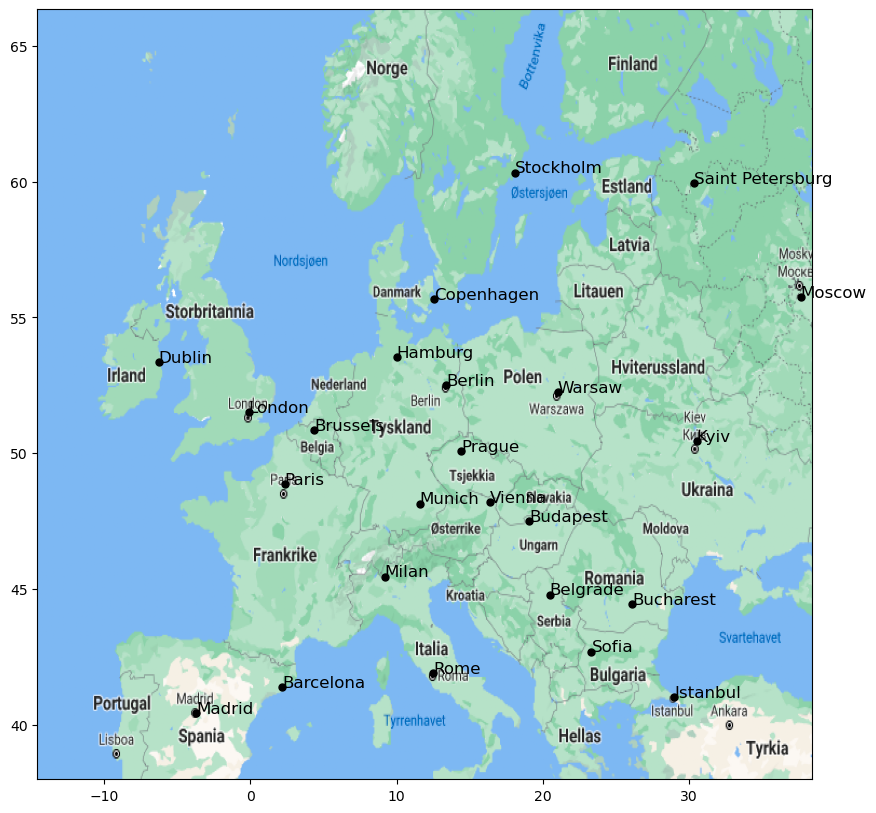

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


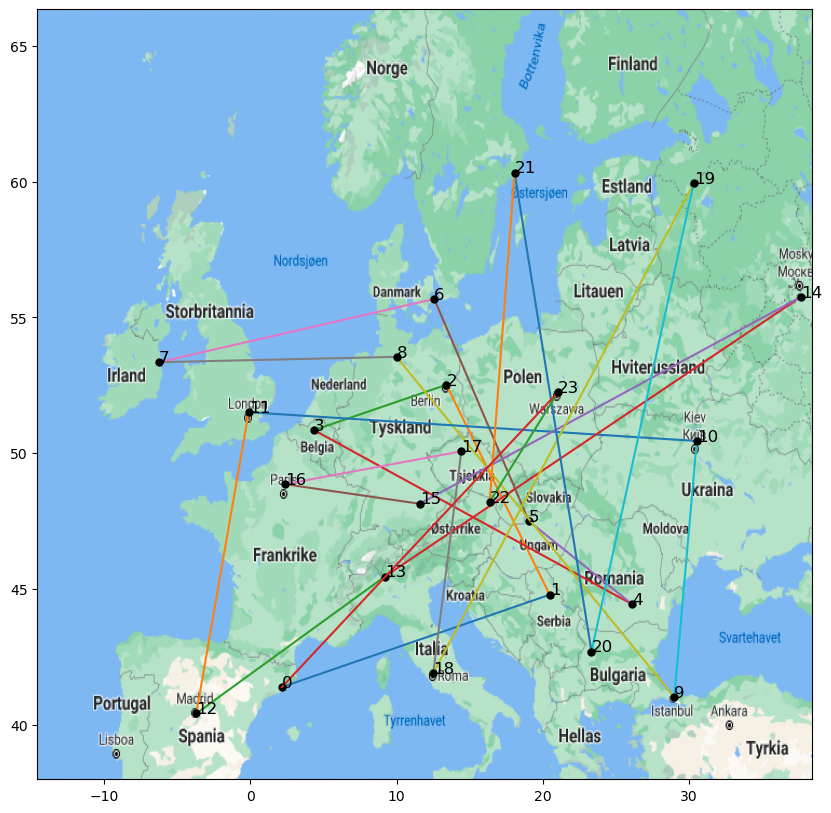

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search

--Shortest Route--
Route: ['Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Brussels', 'Barcelona']
Distance: 3167.3199999999997
Exectuion time: 0.0 seconds



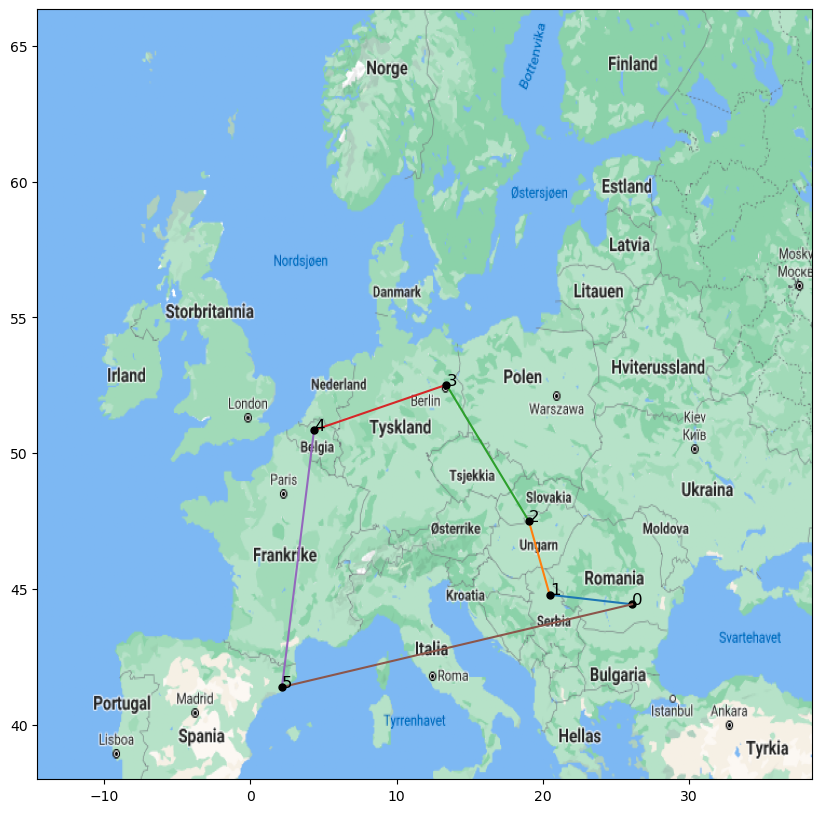

--Shortest Route--
Route: ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
Distance: 5272.68
Exectuion time: 2.9377310276031494 seconds



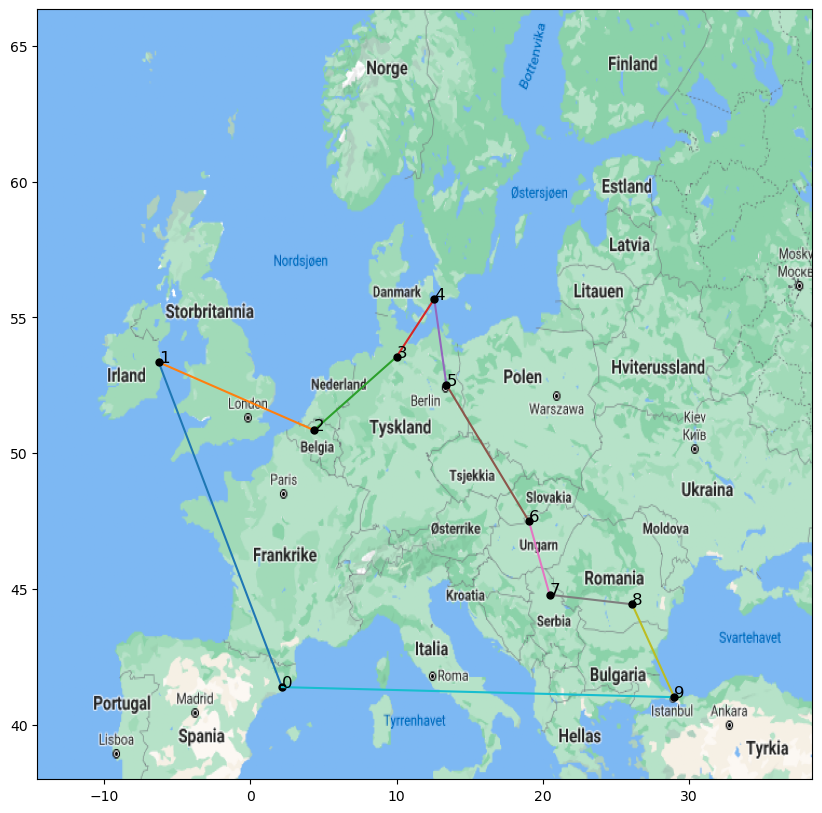

In [5]:
# From testing i know its 24 cities
# Making a 25x25 matrix with header(countries names) and sidebar(countries name).
distance_cities = []

with open('european_cities.csv', mode='r') as file:
    csvFile = csv.reader(file)

    for line in csvFile:
        line_splitted = line[0].split(';')

        new_row = [None]
    
        for e in line_splitted:
            try:
                new_row.append(float(e))
            except:
                new_row.append(e)
     
        distance_cities.append(new_row)


for i in range(1, 25):
    distance_cities[i][0] = distance_cities[0][i]





# Implement the algorithm here
from itertools import permutations
import time

def exhaustive_search(amount_cities):
    dict_cities = {}
    cities = []

    shortest_route = []
    min_route_distance = 0

    for i in range(1, amount_cities+1):
        dict_cities[distance_cities[0][i]] = i
        cities.append(distance_cities[0][i])
    
    # Starting timer
    st = time.time()

    routes = permutations(cities)

    for route in routes:
        route_distance = 0

        transit = 1
        while transit < len(route):
            current_loc = route[transit-1]
            next_loc = route[transit]
            route_distance += distance_cities[dict_cities[current_loc]][dict_cities[next_loc]]
            transit += 1
        
        if route_distance < min_route_distance or min_route_distance == 0:
                min_route_distance =  route_distance
                shortest_route.clear()

                for city in route:
                    shortest_route.append(city)
    
    et = time.time()

    print("--Shortest Route--\nRoute: {}".format(shortest_route))
    print("Distance: {}".format(min_route_distance))
    print("Exectuion time: {} seconds\n".format(et-st))

    return [shortest_route, et-st, min_route_distance]
    

# Shortest path between 6 first cities in the .csv file:
exha_6_countries = exhaustive_search(6)
plot_plan(exha_6_countries[0])


# Shortest path between 10 first cities in the .csv file:
exha_10_countries = exhaustive_search(10)
plot_plan(exha_10_countries[0])


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [6]:
# Answers

# The shortest tour among the first 10 cities is:
#   'Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul'
# My program took: 2.9377310276031494 seconds to find the shortest tour.

time_exha_4_countries = exhaustive_search(4)[1]
time_exha_6_countries = exha_6_countries[1]
time_exha_8_countries = exhaustive_search(8)[1]
time_exha_10_countries = exha_10_countries[1]
time_exha_11_countries = exhaustive_search(11)[1]

x_line = [4, 6, 8, 10, 11]
y_line = [time_exha_4_countries, time_exha_6_countries, time_exha_8_countries, time_exha_10_countries, time_exha_11_countries]

--Shortest Route--
Route: ['Barcelona', 'Brussels', 'Berlin', 'Belgrade']
Distance: 2713.76
Exectuion time: 0.0 seconds

--Shortest Route--
Route: ['Barcelona', 'Dublin', 'Brussels', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest']
Distance: 4816.0
Exectuion time: 0.031311988830566406 seconds

--Shortest Route--
Route: ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul', 'Kyiv']
Distance: 6325.63
Exectuion time: 65.9842758178711 seconds



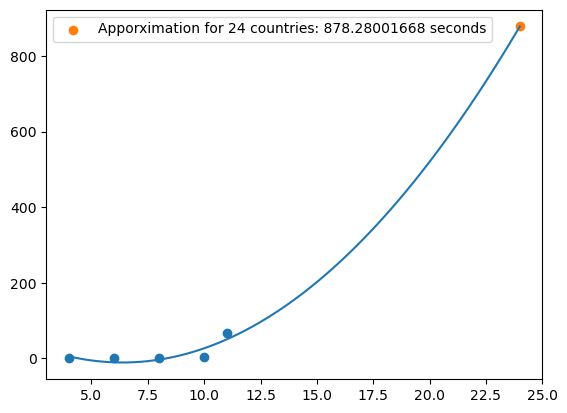

In [7]:
from scipy.optimize import curve_fit

def calculate_apporximation():
    def func(x, a, b, c):
        return a*np.power(x, 2) + b*x + c

    predict_ = 24
    coefficients, covariance = curve_fit(func, x_line, y_line)
    a_predict, b_predict, c_predict = coefficients
    y_predict1 = func(24, a_predict, b_predict, c_predict)

    x_predict = np.linspace(min(x_line), 24, 100)
    y_predict2 = func(x_predict, a_predict, b_predict, c_predict)

    plt.scatter(x_line, y_line)
    plt.plot(x_predict, y_predict2)
    plt.scatter(24, y_predict1, label=f'Apporximation for 24 countries: {y_predict1:.8f} seconds')
    plt.legend()

calculate_apporximation()

# It will approxmately take around 900 to 1000 seconds for it to run exhaustive search on 24 countries.

## Hill Climbing
For the first **10 cities** and with all **24 cities**. 

--Best Hill Climbing 10 Countries--
Route: ['Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Hamburg', 'Copenhagen', 'Brussels', 'Dublin', 'Barcelona']
Distance: 5450.07
Exectuion time: 0.0 seconds

--Worst Hill Climbing 10 Countries--
Route: ['Brussels', 'Hamburg', 'Berlin', 'Copenhagen', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul', 'Barcelona', 'Dublin']
Distance: 7018.69
Exectuion time: 0.0 seconds

--Exhaustive Search 10 Countries--
Route: ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
Distance: 5272.68
Exectuion time: 2.9377310276031494 seconds


--Comparison review--
Exhaustive Search evaluates every solutions and guarentees an global optimum but sacrifaces efficiency alot.
While Hill Climber is much more efficently. While it does not guarentie to find the global optimum, it finds a reasonable optimum without the cost of efficiency.
In this case, the best case scenario for Hill Climbing is onl

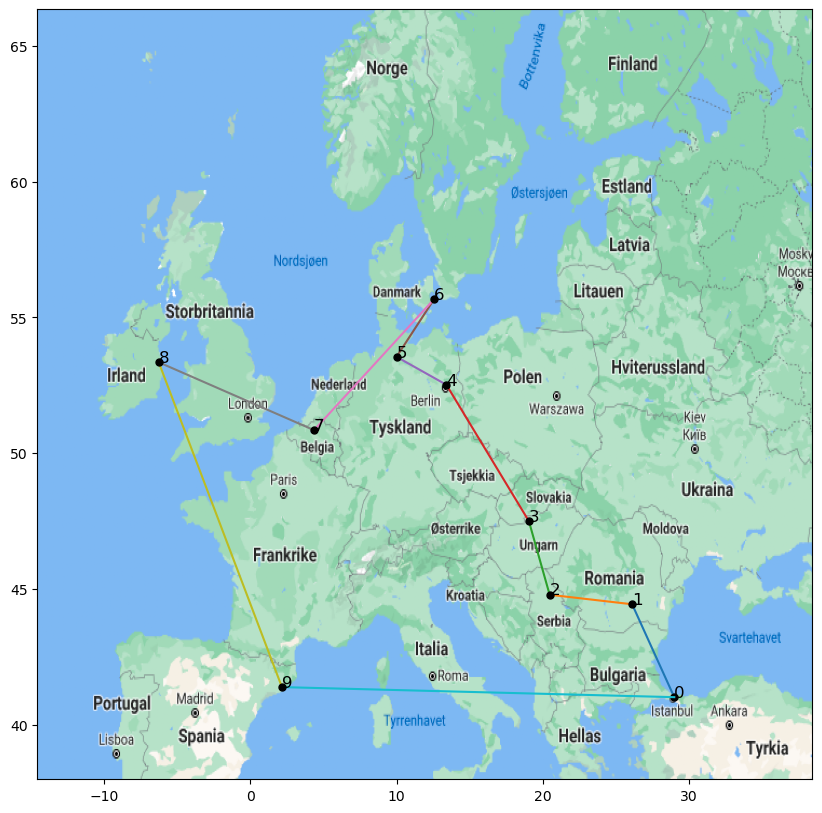

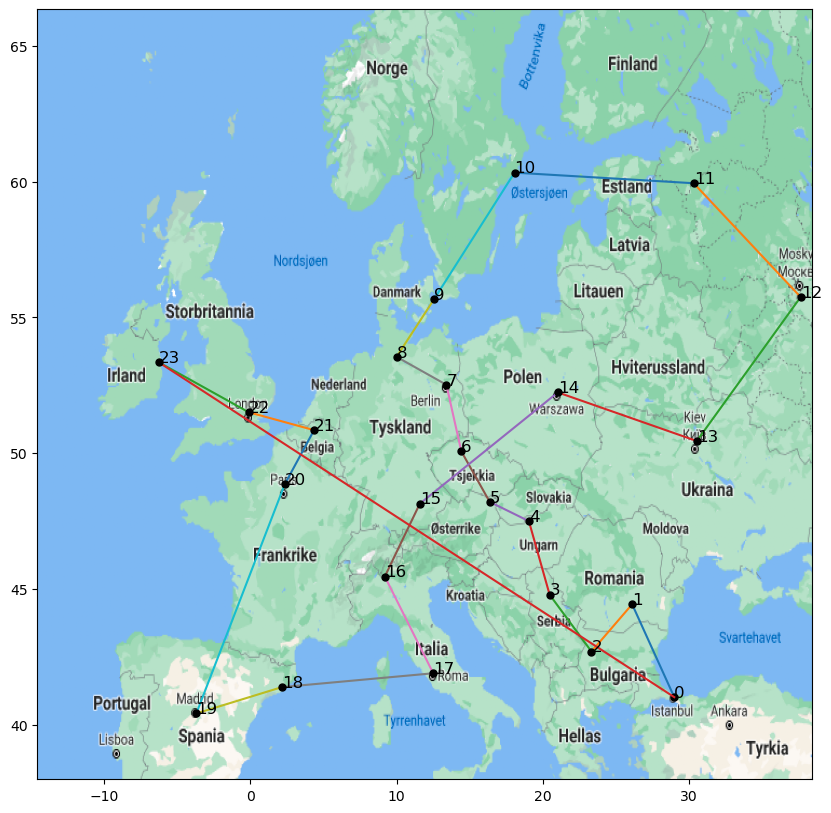

In [8]:
# Implement the algorithm here
from random import randrange

def hill_climbing(amount_cities):
    dict_cities = {}
    cities = []

    to_be_visited = []

    shortest_route = []
    min_route_distance = 0

    for i in range(1, amount_cities+1):
        dict_cities[distance_cities[0][i]] = i
        cities.append(distance_cities[0][i])
        to_be_visited.append(distance_cities[0][i])

    def visit_city(city):
        shortest_route.append(city)
        to_be_visited.remove(city)

    st = time.time()
    
    temp_city = to_be_visited[randrange(len(cities))]
    visit_city(temp_city)
    
    while len(to_be_visited) > 0 :
        recent_visited = shortest_route[len(shortest_route)-1]
        
        distance_to_city = 0
        temp_visited = ''
        
        for next_city in to_be_visited:
            distance_between = distance_cities[dict_cities[recent_visited]][dict_cities[next_city]]

            if distance_between < distance_to_city or distance_to_city == 0:
                distance_to_city = distance_between
                temp_visited = next_city
            
        visit_city(temp_visited)
    
    et = time.time()

    for i in range(len(shortest_route)-1):
        current_city = dict_cities[shortest_route[i]]
        next_city = dict_cities[shortest_route[i+1]]
        min_route_distance += distance_cities[current_city][next_city]

    return [shortest_route, et-st, min_route_distance]

    
best_hill_10_countries = hill_climbing(10)
worst_hill_10_countries = hill_climbing(10)
# Its a stochastic algorithm, so I will run it 5 more times and choose the one with lowest distance.
for i in range(18):
    temp_10 = hill_climbing(10)
    if temp_10[2] < best_hill_10_countries[2]:
        best_hill_10_countries = temp_10
    elif temp_10[2] > worst_hill_10_countries[2]:
        worst_hill_10_countries = temp_10

print("--Best Hill Climbing 10 Countries--\nRoute: {}".format(best_hill_10_countries[0]))
print("Distance: {}".format(best_hill_10_countries[2]))
print("Exectuion time: {} seconds\n".format(best_hill_10_countries[1]))

print("--Worst Hill Climbing 10 Countries--\nRoute: {}".format(worst_hill_10_countries[0]))
print("Distance: {}".format(worst_hill_10_countries[2]))
print("Exectuion time: {} seconds\n".format(worst_hill_10_countries[1]))

print("--Exhaustive Search 10 Countries--\nRoute: {}".format(exha_10_countries[0]))
print("Distance: {}".format(exha_10_countries[2]))
print("Exectuion time: {} seconds\n".format(exha_10_countries[1]))

print("\n--Comparison review--\nExhaustive Search evaluates every solutions and guarentees an global optimum but sacrifaces efficiency alot.")
print("While Hill Climber is much more efficently. While it does not guarentie to find the global optimum, it finds a reasonable optimum without the cost of efficiency.")
print("In this case, the best case scenario for Hill Climbing is only around 300 away in distance from global optimum from exhaustive search, and is also very very efficient(time) in comparison.\n\n")


best_hill_24_countries = hill_climbing(24)
worst_hill_24_countries = hill_climbing(24)
# Its a stochastic algorithm, so I will run it 5 more times and choose the one with lowest distance.
for i in range(18):
    temp_24 = hill_climbing(24)
    if temp_24[2] < best_hill_24_countries[2]:
        best_hill_24_countries = temp_24
    elif temp_24[2] > worst_hill_24_countries[2]:
        worst_hill_24_countries = temp_24

print("--Best Hill Climbing 24 Countries--\nRoute: {}".format(best_hill_24_countries[0]))
print("Distance: {}".format(best_hill_24_countries[2]))
print("Exectuion time: {} seconds\n".format(best_hill_24_countries[1]))

print("--Worst Hill Climbing 24 Countries--\nRoute: {}".format(worst_hill_24_countries[0]))
print("Distance: {}".format(worst_hill_24_countries[2]))
print("Exectuion time: {} seconds\n".format(worst_hill_24_countries[1]))


plot_plan(best_hill_10_countries[0])
plot_plan(best_hill_24_countries[0])

## Genetic Algorithm

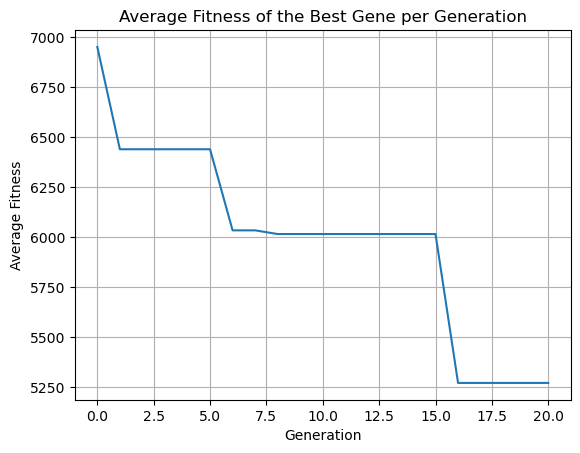

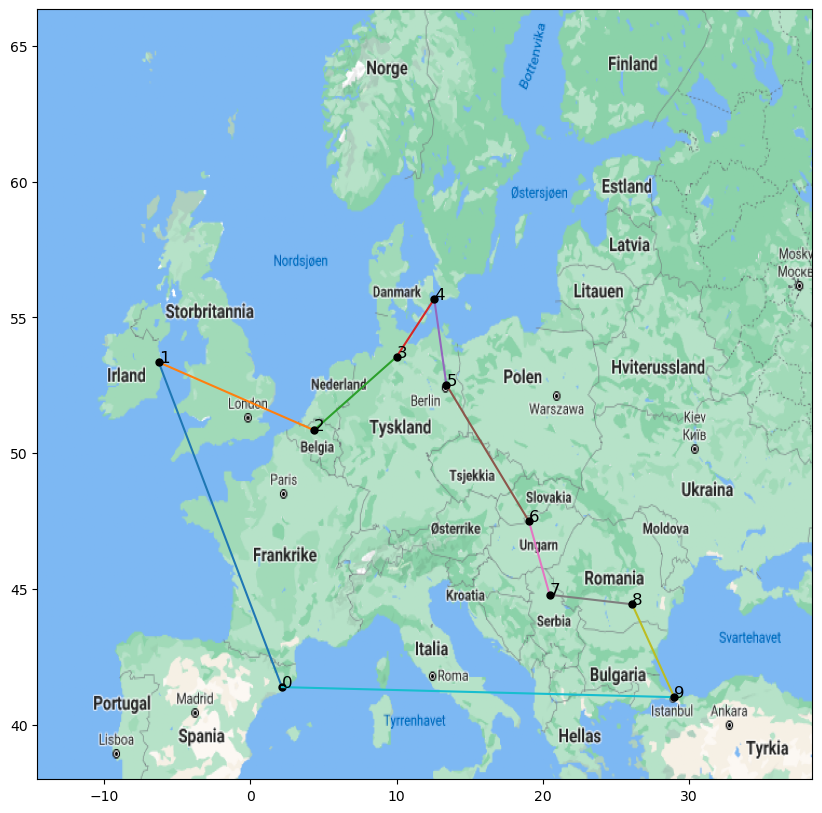

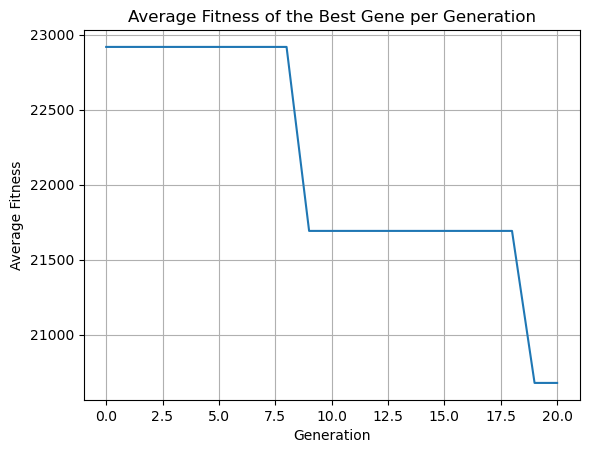

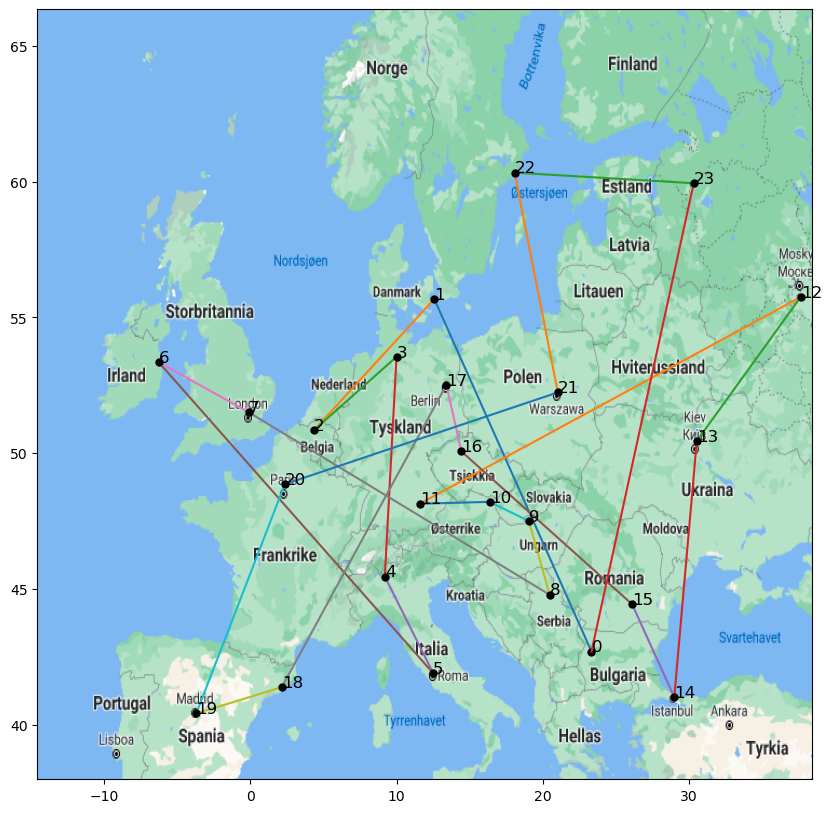

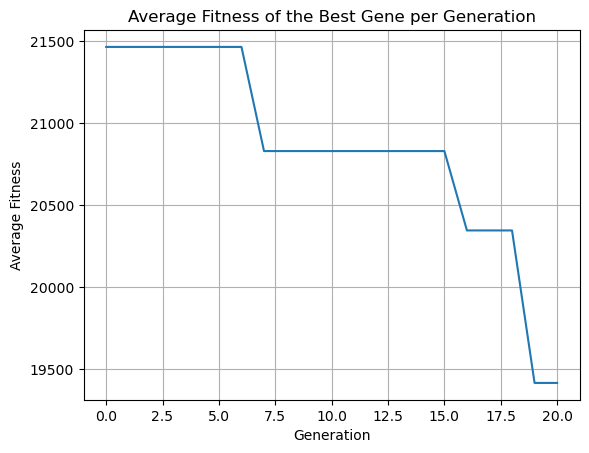

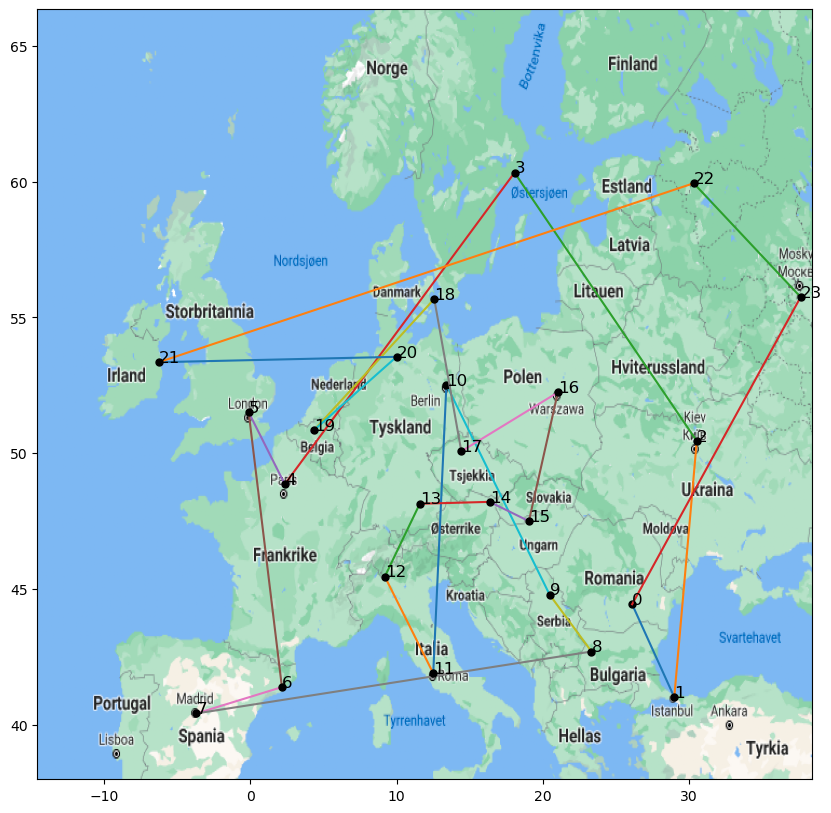

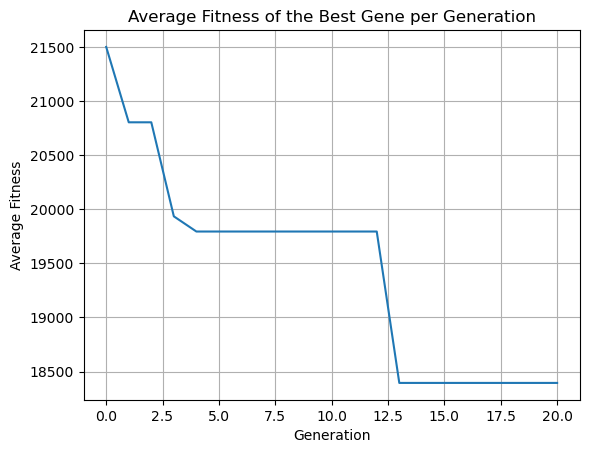

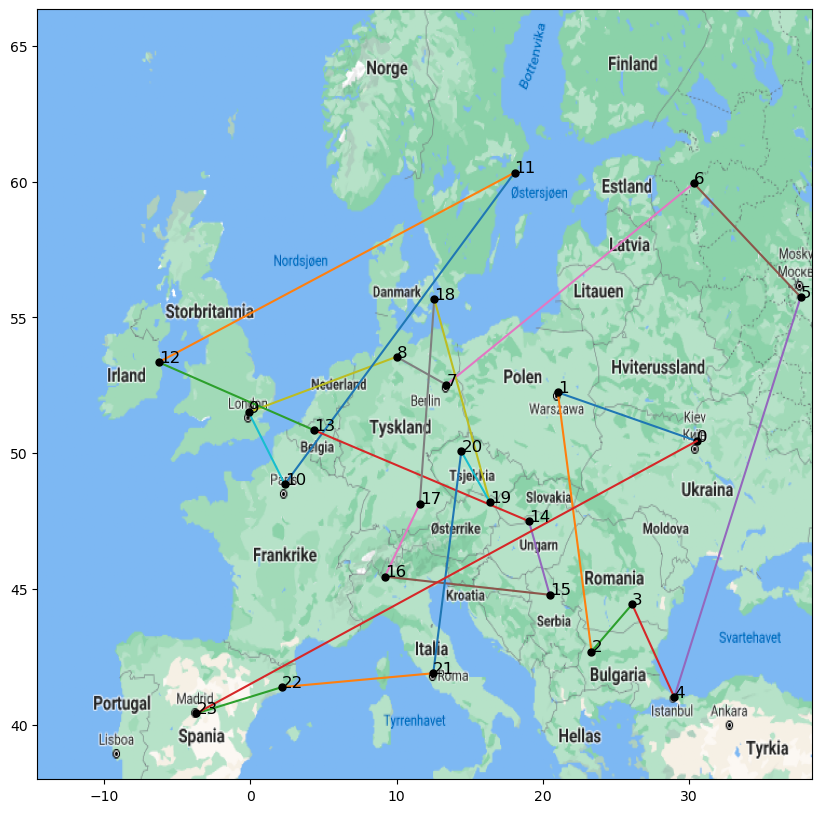

In [355]:
# Implement the algorithm here 
from random import sample

def calculate_distance(route):
    distance = 0

    for i in range(len(route)-1):
        distance += distance_cities[route[i]][route[i+1]]
    
    return distance


def generate_population(amount_cities, amount_random_routes):
    cities = [] # List of city names.
    cities_index = [] # List of the cities indexes

    # Associating cities and their location in the matrix
    for i in range(1, amount_cities+1):
        cities.append(distance_cities[0][i])
        cities_index.append(i)

    
    # Generating random routes
    random_routes = []

    for i in range(amount_random_routes):
        random_routes.append(sample(cities_index, amount_cities))
    
    return random_routes

        

def genetic_algorithm(population, amount_selection):
    mutation_percentage = 10

    temp_population = [i for i in population]

    # Selection - selecting the shortest routes
    # Making a list with route distances
    route_distances = []

    for route in temp_population:
        route_distances.append(calculate_distance(route))
    
    # Putting the shortest route in the new list and removes it from the old list
    shortest_routes = []

    for i in range(amount_selection):
        temp_index = route_distances.index(min(route_distances))
        shortest_routes.append(temp_population[temp_index])
        
        temp_population.pop(temp_index)
        route_distances.pop(temp_index)
    


    # Partially mapped Crossover
    children = []
    route_distance = len(population[0])
    middle = int(route_distance/2)

    for i in range(int(len(shortest_routes)/2)):
        # Segment between positions:
        pos1 = randrange(1, middle)
        pos2 = randrange(middle, route_distance-1)

        temp_child = []
        for i in range(route_distance):
            temp_child.append(0)
        
        # Randomly choosing parents and removing them from the list
        temp_parent1 = shortest_routes.pop(randrange(len(shortest_routes)))
        temp_parent2 = shortest_routes.pop(randrange(len(shortest_routes)))

        # Step 1
        # Putting elements from parent1 to the child
        for i in range(pos1, pos2+1):
            temp_child[i] = temp_parent1[i]
        
        # Step 2
        # Checking if all the elements in the child between the positions include all elements from parent2
        temp_i = []
        temp_j = [] # Gene not a element in child yet
        for i in range(pos1, pos2+1):
            if temp_parent2[i] not in temp_child:
                temp_index = temp_parent2.index(temp_parent2[i])
                temp_i.append(temp_parent1[temp_index])
                temp_j.append(temp_parent2[temp_index])
    
        # If a gene/element or elements between the positions is missing in child from parent2, locate old position
        for i in range(len(temp_j)):
            temp_index = temp_parent2.index(temp_i[i])
            pos_taken = []

            while True:
                if (temp_index < pos1 or pos2 < temp_index) and temp_index not in pos_taken:
                    temp_child[temp_index] = temp_j[i]
                    pos_taken.append(temp_index)
                    break
                else:
                    temp_value = temp_parent1[temp_index]
                    temp_index = temp_parent2.index(temp_value)  

        """
            pos1 = 2
            pos2 = 5
            
            Missing in child from parent2 (temp_j) = [9, 1]
            same index of the missing elements, values from parent1 (temp_i) = [3, 7] (parent1[3] = 9, parent2[3] = 3)

            parent1 = [1, 8, 2, 3, 7, 10, 5, 9, 4, 6]
            parent2 = [4, 10, 3, 9, 1, 7, 8, 2, 5, 6]'

            temp_child before step 2:
                [0, 0, 2, 3, 7, 10, 0, 0, 0, 0, ]
            temp_child after step 2:
                [0, 1, 2, 3, 7, 10, 0, 9, 0, 0, ]
        """
        
        # step 3
        # Fill the rest of the genes with elements from parent2
        for i in range(len(temp_child)):
            if temp_child[i] == 0:
                temp_child[i] = temp_parent2[i]

        # Adding child to children list
        children.append(temp_child)



    # Swap mutation
    # Every children have a % chance to get swapped with another random country in the list. See variable "mutation_percentage" above at the start of the function
    for route in children:
        for i in range(len(route)):
            if randrange(mutation_percentage) == 0:
                temp_city = route[i]
                temp_index = randrange(len(route))
                # While the other random city isnt the current city, get another random city
                while temp_index == i:
                    temp_index = randrange(len(route))
                # Switch positions between cities
                route[i] = route[temp_index]
                route[temp_index] = temp_city



    # Replace population
    population_size = len(population)

    # Adding children to population
    for i in children:
        population.append(i)
    
    # Making a list with route distances. The index is associating the route and the route distance in both lists.
    route_distances.clear()
    for i in population:
        route_distances.append(calculate_distance(i))

    # Removes routes with the farthest distances
    for i in range(len(population) - population_size):
        temp_index_remove = route_distances.index(max(route_distances))
        route_distances.pop(temp_index_remove)
        population.pop(temp_index_remove)

# End of algorithm









x_line_ge = [i for i in range(0, 21)] # generations
y_line_ge = [] # best

def find_min(population):
    distances = []
    for i in population:
        distances.append(calculate_distance(i))
    return min(distances)


def plot_populations(population):

    plt.plot(x_line_ge, y_line_ge)
    plt.title('Average Fitness of the Best Gene per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.grid(True)
    plt.show()

    distancess = []
    for i in population:
        distancess.append(calculate_distance(i))
    index = distancess.index(min(distancess))
    population_route = []
    for i in population[index]:
        population_route.append(distance_cities[0][i])
    plot_plan(population_route)

    

# 10 Countries
# Population = 2500
population1 = generate_population(10, 2700) # generation 0
y_line_ge.append(find_min(population1))
st1 = time.time()
genetic_algorithm(population1, 2400) # generation 1
y_line_ge.append(find_min(population1))
for i in range(19):
    genetic_algorithm(population1, 2400) # generation 20
    y_line_ge.append(find_min(population1))
et1 = time.time()
time_10 = et1-st1

plot_populations(population1)




y_line_ge.clear()

# 24 Countries
# Population = 100
population2 = generate_population(24, 100) # generation 0
y_line_ge.append(find_min(population2))
genetic_algorithm(population2, 70) # generation 1
y_line_ge.append(find_min(population2))
for i in range(19):
    genetic_algorithm(population2, 70) # generation 20
    y_line_ge.append(find_min(population2))

plot_populations(population2)




y_line_ge.clear()

# 24 Countries
# Population = 400
population3 = generate_population(24, 400) # generation 0
y_line_ge.append(find_min(population3))
genetic_algorithm(population3, 280) # generation 1
y_line_ge.append(find_min(population3))
for i in range(19):
    genetic_algorithm(population3, 280) # generation 20
    y_line_ge.append(find_min(population3))

plot_populations(population3)




y_line_ge.clear()

# 24 Countries
# Population = 1000
population4 = generate_population(24, 10000) # generation 0
y_line_ge.append(find_min(population4))
st2 = time.time()
genetic_algorithm(population4, 8000) # generation 1
y_line_ge.append(find_min(population4))
for i in range(19):
    genetic_algorithm(population4, 8000) # generation 20
    y_line_ge.append(find_min(population4))
et2 = time.time()
time_24 = et2-st2

plot_populations(population4)


# The best combination is 24 countries and population of 1000 for the evolutionary algorithm



In [359]:
def find_smallest_route():
    distances = []
    for i in population1:
        distances.append(calculate_distance(i))
    min_distance = min(distances)
    route_show = []
    for i in population1[distances.index(min_distance)]:
        route_show.append(distance_cities[0][i])
    return [route_show, min_distance]


shortest_route = find_smallest_route()

print("Shortest route: {}".format(shortest_route[0]))
print("Shortest route distance: {}".format(shortest_route[1]))
# With 10 countries, with a population of 2700, crossover with 2400 that generated 1200 new children each time.
# I find "SOMETIMES" the shortest route like from the exhaustive search and with that the same distance of 5272.68
# Most of the time i get around 5400 to 5900 in distance on shortest route.
# Print:
# Shortest route:  ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
# Shortest route distance: 5272.68


print("GA: Time for 10 cities: {}".format(time_10))
print("GA: Time for 20 cities:{} ".format(time_24))
# GA for 10 cities did 4.2517249584198 seconds, while EX did 65.9842758178711 seconds.
# GA for 25 cities did 53.30172300338745 seconds, while I did not try EX, it would have probably done 828.2800 seconds. 
# The time difference is very big and i still think that with with smaller routes, it is a good choice.
# But I think it can be slow and not worth it for big routes, from what I have seen from the result of hill climbing. 


# Exhaustive search for 10 cities inspected 3,628,800. While GA for 10 cities inspected 26,700.
# GA generated 2700 routes and in each generation made 1200 new routes.

Shortest route: ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
Shortest route distance: 5272.68
GA: Time for 10 cities: 4.2517249584198
GA: Time for 20 cities:53.30172300338745
